### Importaciones

In [ ]:
pip install imblearn w

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay, f1_score, precision_score, recall_score, multilabel_confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Train test

In [3]:
X = df.drop(columns=["quality"])
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


### Logistic Regression Multiclase con GridSearchCV

In [9]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=500, random_state =11))])

param_grid = {"logreg__C": [0.1, 1, 3, 5, 10]}

grid = GridSearchCV(pipe,param_grid,cv=5,scoring="accuracy",n_jobs=-1)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("Mejor C:", grid.best_params_)

y_pred_log = best_model.predict(X_test)
print("Accuracy (Logistic GS):", accuracy_score(y_test, y_pred_log))


with open("logistic_gs.pkl", "wb") as f:
    pickle.dump(best_model, f)


Mejor C: {'logreg__C': 0.1}
Accuracy (Logistic GS): 0.565625


### RandomForest con GridSearchCV

In [11]:
rf = RandomForestClassifier(random_state=11)

param_grid = {
    "n_estimators": [200, 300, 500],
    "max_depth": [3, 10, 20, 30]}

grid = GridSearchCV(rf,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)

y_pred_rf = best_rf.predict(X_test)
print("Accuracy (RF GS):", accuracy_score(y_test, y_pred_rf))


with open("random_forest_gs.pkl", "wb") as f:
    pickle.dump(best_rf, f)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros: {'max_depth': 20, 'n_estimators': 200}
Accuracy (RF GS): 0.68125


### Adaboost con GridSearchCV

In [ ]:
ada = AdaBoostClassifier(random_state=11)

param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0]}

grid = GridSearchCV(ada,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)


grid.fit(X_train, y_train)
best_ada = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)


y_pred_ada = best_ada.predict(X_test)
print("Accuracy (AdaBoost GS):", accuracy_score(y_test, y_pred_ada))


with open("adaboost_gs.pkl", "wb") as f:
    pickle.dump(best_ada, f)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros: {'learning_rate': 0.1, 'n_estimators': 500}
Accuracy AdaBoost (GS): 0.55


### Gradientboost con GridSearchCV

In [13]:
gb = GradientBoostingClassifier(random_state=11)

param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4, 5, 6]}

grid = GridSearchCV(gb,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)


grid.fit(X_train, y_train)
best_gb = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)

y_pred_gb = best_gb.predict(X_test)
print("Accuracy (GradientBoost GS):", accuracy_score(y_test, y_pred_gb))


with open("gradient_boosting_gs.pkl", "wb") as f:
    pickle.dump(best_gb, f)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Accuracy GradientBoost (GS): 0.646875


### XGBoost con GrindSearchCV

In [30]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=11,stratify=y_encoded)


xgb_model = xgb.XGBClassifier(objective="multi:softprob",num_class=len(np.unique(y_encoded)),eval_metric="mlogloss",random_state=11,n_jobs=-1)


param_grid = {
    "n_estimators": [200, 300, 500],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 4, 6, 8]}

grid = GridSearchCV(xgb_model,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)


grid.fit(X_train, y_train)
best_xgb = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)

y_pred_xgb = best_xgb.predict(X_test)
print("Accuracy (XGBoost GS):", accuracy_score(y_test, y_pred_xgb))


with open("xgboost_gs.pkl", "wb") as f:
    pickle.dump({"model": best_xgb,"label_encoder": le},f)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300}
Accuracy (XGBoost GS): 0.665625


### Saco el matriz de confusion de mis mejores modelos

#### XGBoost

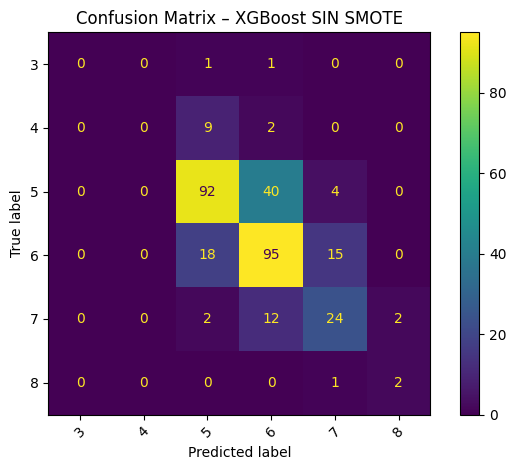

In [31]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=11,stratify=y_encoded)

xgb_no_smote = xgb.XGBClassifier(objective="multi:softprob",num_class=len(le.classes_),eval_metric="mlogloss",learning_rate=0.05,max_depth=8,n_estimators=300,random_state=11,n_jobs=-1)

xgb_no_smote.fit(X_train, y_train)
y_pred_xgb_ns = xgb_no_smote.predict(X_test)


labels = np.unique(y_test)
target_names = [str(le.classes_[i]) for i in labels]


ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_xgb_ns,
    labels=labels,
    display_labels=target_names,
    xticks_rotation=45)

plt.title("Confusion Matrix – XGBoost SIN SMOTE")
plt.tight_layout()
plt.show()

#### XGBoost + SMOTE


Accuracy XGBoost + SMOTE: 0.6625


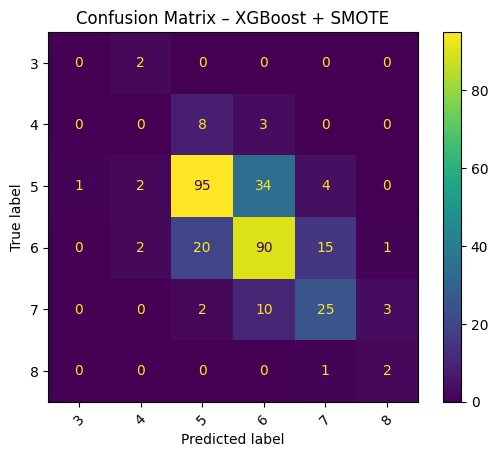

In [32]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_mapping = dict(zip(le.classes_, range(len(le.classes_))))
inv_class_mapping = {v: k for k, v in class_mapping.items()}

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=11,stratify=y_encoded)

sampling_strategy = {
    class_mapping[3]: 100,
    class_mapping[4]: 200,
    class_mapping[7]: 200,
    class_mapping[8]: 100}

smote = SMOTE(sampling_strategy=sampling_strategy,random_state=11,k_neighbors=2)

xgb_model = xgb.XGBClassifier(objective="multi:softprob",num_class=len(le.classes_),eval_metric="mlogloss",learning_rate=0.05,max_depth=8,n_estimators=300,random_state=11,n_jobs=-1)


pipe = Pipeline(steps=[("smote", smote),("xgb", xgb_model)])


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy XGBoost + SMOTE: {accuracy:.4f}")

labels = np.unique(y_test)
target_names = [str(le.classes_[i]) for i in labels]


ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=target_names,xticks_rotation=45)
plt.title("Confusion Matrix – XGBoost + SMOTE")
plt.show()

#### Random Forest

<Figure size 700x600 with 0 Axes>

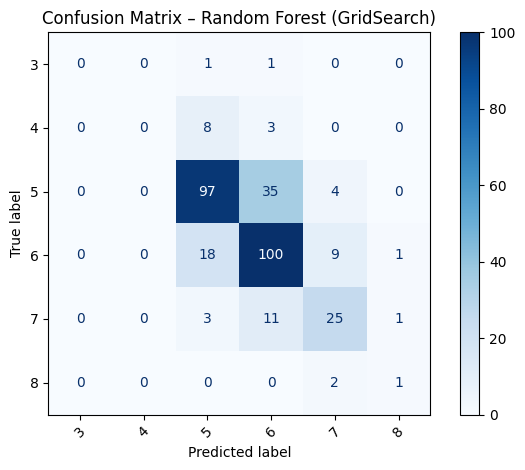

In [ ]:

y_pred_rf = best_rf.predict(X_test)


labels = np.unique(y_test)
target_names = [str(le.classes_[i]) for i in labels]


cm = confusion_matrix(y_test, y_pred_rf, labels=labels)


disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=target_names
)

plt.figure(figsize=(7, 6))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix – Random Forest")
plt.tight_layout()
plt.show()


### Comparo los modelos

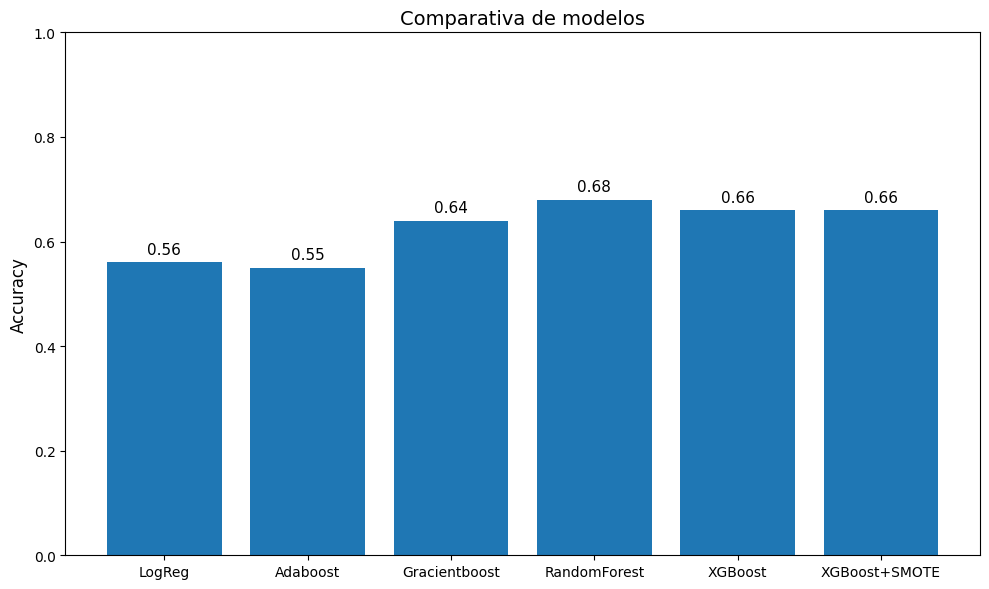

In [27]:
acc_logreg = 0.56
acc_ada = 0.55
acc_gb = 0.64
acc_rf = 0.68
acc_xgb = 0.66
acc_xgb_smote = 0.66

models = ["LogReg","Adaboost","Gracientboost","RandomForest","XGBoost", "XGBoost+SMOTE"]

accuracies = [acc_logreg,acc_ada,acc_gb,acc_rf,acc_xgb, acc_xgb_smote]

plt.figure(figsize=(10, 6))

bars = plt.bar(models, accuracies)

plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.title("Comparativa de modelos", fontsize=14)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=11)

plt.tight_layout()
plt.show()

# Conclusión: uso Random Forest como modelo final